## Estudio de las caracteristicas de los jets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/david/salida.csv")

In [4]:
print(df.columns)

Index(['nFatJet', 'nFatJet_eta', 'FatJet_eta', 'nFatJet_mass', 'FatJet_mass',
       'nFatJet_msoftdrop', 'FatJet_msoftdrop', 'nFatJet_phi', 'FatJet_phi',
       'nFatJet_pt', 'FatJet_pt', 'nFatJet_tau1', 'FatJet_tau1',
       'nFatJet_tau2', 'FatJet_tau2', 'nFatJet_tau3', 'FatJet_tau3',
       'nFatJet_jetId', 'FatJet_jetId', 'nFatJet_nConstituents',
       'FatJet_nConstituents'],
      dtype='object')


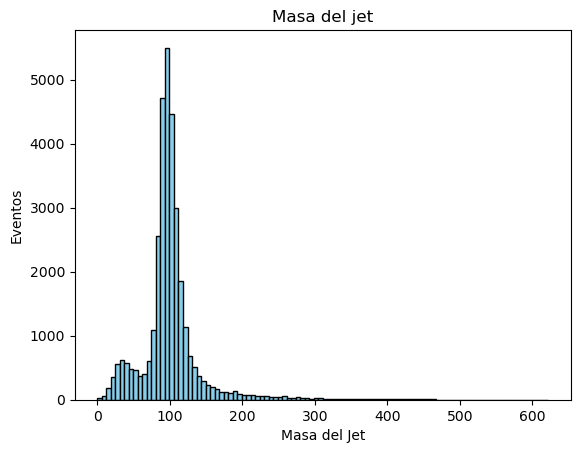

In [5]:
# Graficar la masa
plt.hist(df["FatJet_mass"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Masa del Jet")
plt.ylabel("Eventos")
plt.title("Masa del jet")
plt.show()

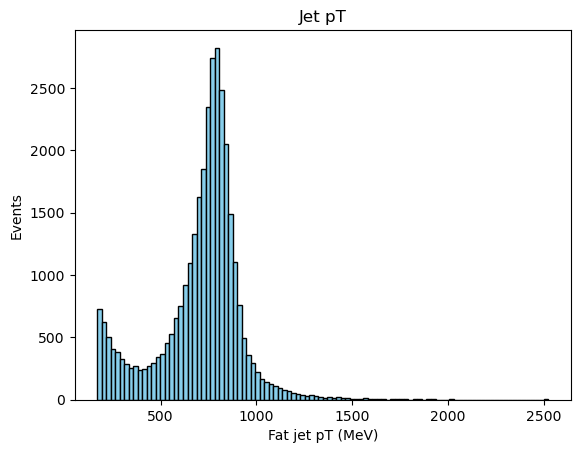

In [6]:
# Graficar el pt
plt.hist(df["FatJet_pt"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Fat jet pT (MeV)")
plt.ylabel("Events")
plt.title("Jet pT")
plt.show()

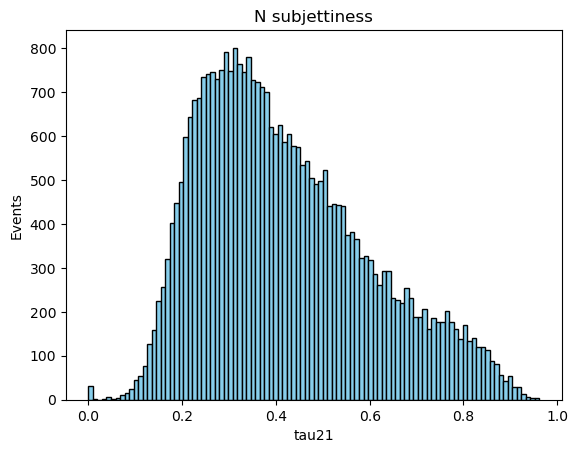

In [7]:
df["tau2/tau1"] = df["FatJet_tau2"] / df["FatJet_tau1"]
plt.hist(df["tau2/tau1"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("tau21")
plt.ylabel("Events")
plt.title("N subjettiness")
plt.show()

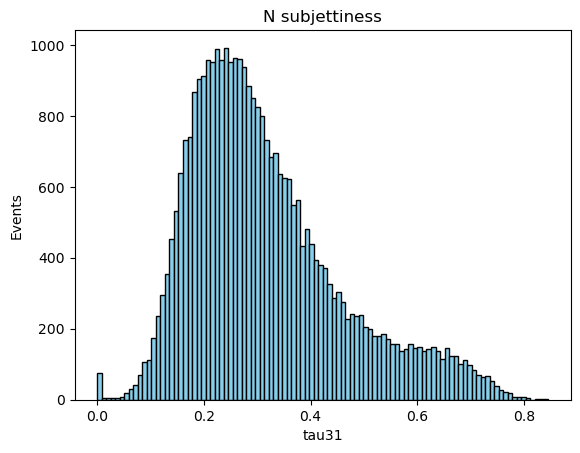

In [8]:
df["tau3/tau1"] = df["FatJet_tau3"] / df["FatJet_tau1"]
plt.hist(df["tau3/tau1"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("tau31")
plt.ylabel("Events")
plt.title("N subjettiness")
plt.show()

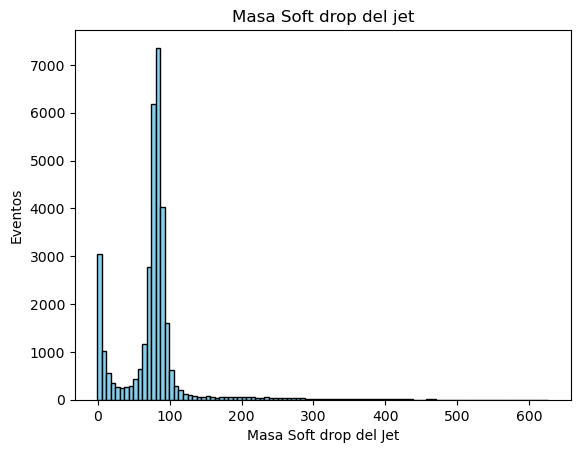

In [9]:
# Graficar la masa
plt.hist(df["FatJet_msoftdrop"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Masa Soft drop del Jet")
plt.ylabel("Eventos")
plt.title("Masa Soft drop del jet")
plt.show()

Preprocesamiento de los datos

Categorical features: []
MSE: 86.868
R2: 0.955


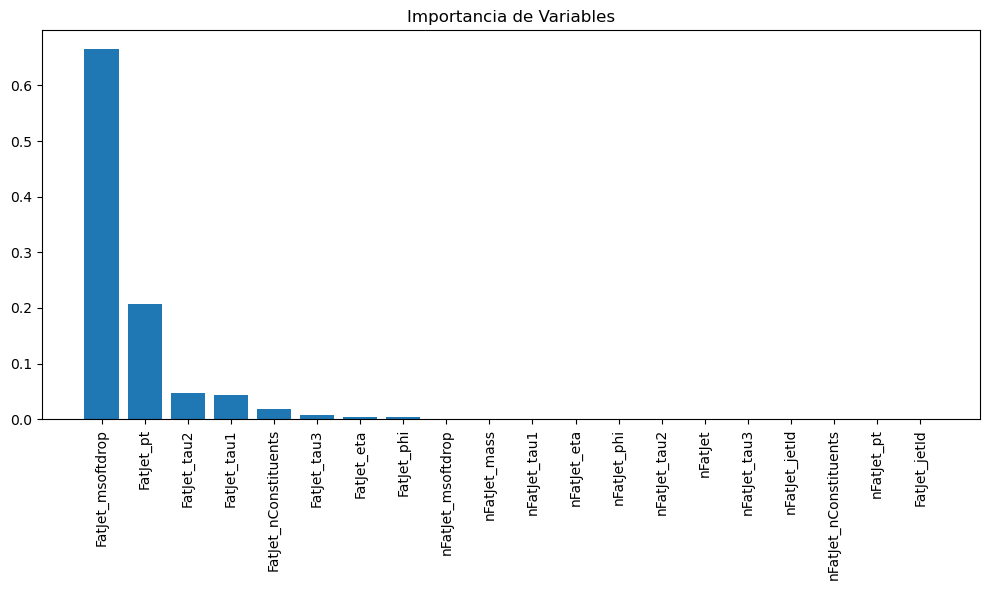

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_csv("/home/david/salida.csv")
target = "FatJet_mass"
X = df.drop(columns=[target])
y = df[target]

# Identificar variables numéricas y categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical features:", categorical_features)

# Preprocesamiento numérico: imputar y escalar
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Preprocesamiento categórico: imputar y codificar
categorical_imputer = SimpleImputer(strategy="most_frequent")
onehot_encoder = OneHotEncoder(handle_unknown="ignore")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Procesar variables categóricas (si existen)
if len(categorical_features) > 0:
    X_train_cat_imputed = categorical_imputer.fit_transform(X_train[categorical_features])
    onehot_encoder.fit(X_train_cat_imputed)
    X_train_cat_processed = onehot_encoder.transform(X_train_cat_imputed).toarray()
else:
    X_train_cat_processed = np.empty((len(X_train), 0))

# Procesar variables numéricas
X_train_num_processed = numeric_transformer.fit_transform(X_train[numeric_features])

# Concatenar numéricas y categóricas
X_train_processed = np.hstack([X_train_num_processed, X_train_cat_processed])

# Función para preprocesar nuevos datos
def preprocessor_fit_transform(X):
    X_num = numeric_transformer.transform(X[numeric_features])
    if len(categorical_features) > 0:
        X_cat_imputed = categorical_imputer.transform(X[categorical_features])
        X_cat = onehot_encoder.transform(X_cat_imputed).toarray()
    else:
        X_cat = np.empty((len(X), 0))
    return np.hstack([X_num, X_cat])

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)

# Preprocesar test y predecir
X_test_processed = preprocessor_fit_transform(X_test)
y_pred = model.predict(X_test_processed)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}")

# Importancia variables
importances = model.feature_importances_

# Nombres variables
if len(categorical_features) > 0:
    onehot_columns = onehot_encoder.get_feature_names_out(categorical_features)
else:
    onehot_columns = np.array([])

feature_names = np.concatenate([numeric_features, onehot_columns])

# Gráfico importancia
plt.figure(figsize=(10,6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Importancia de Variables")
plt.tight_layout()
plt.show()



 Scatter plots

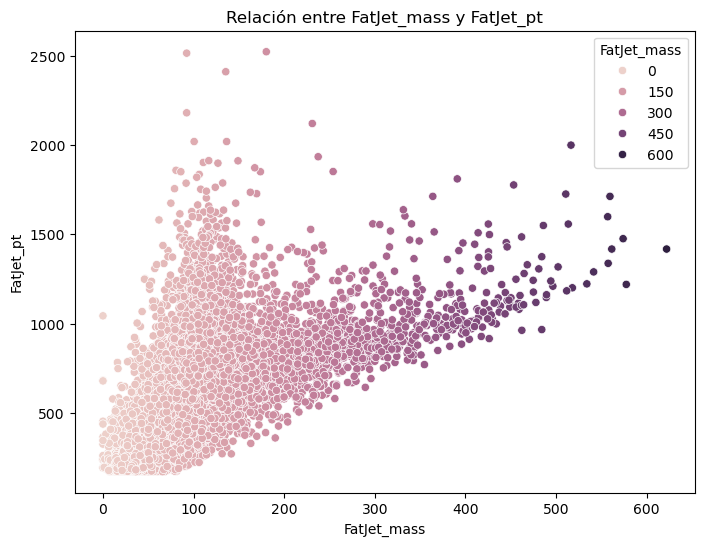

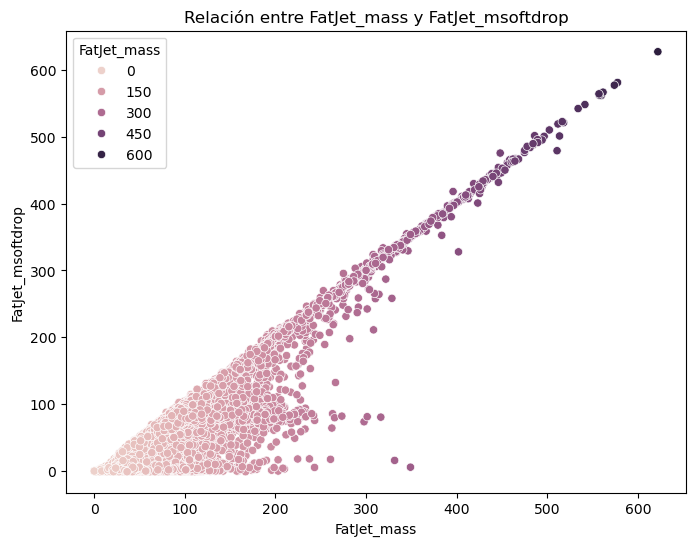

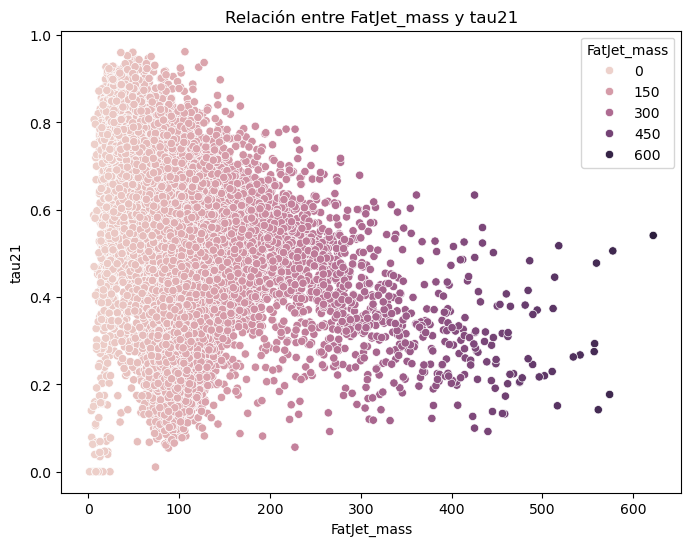

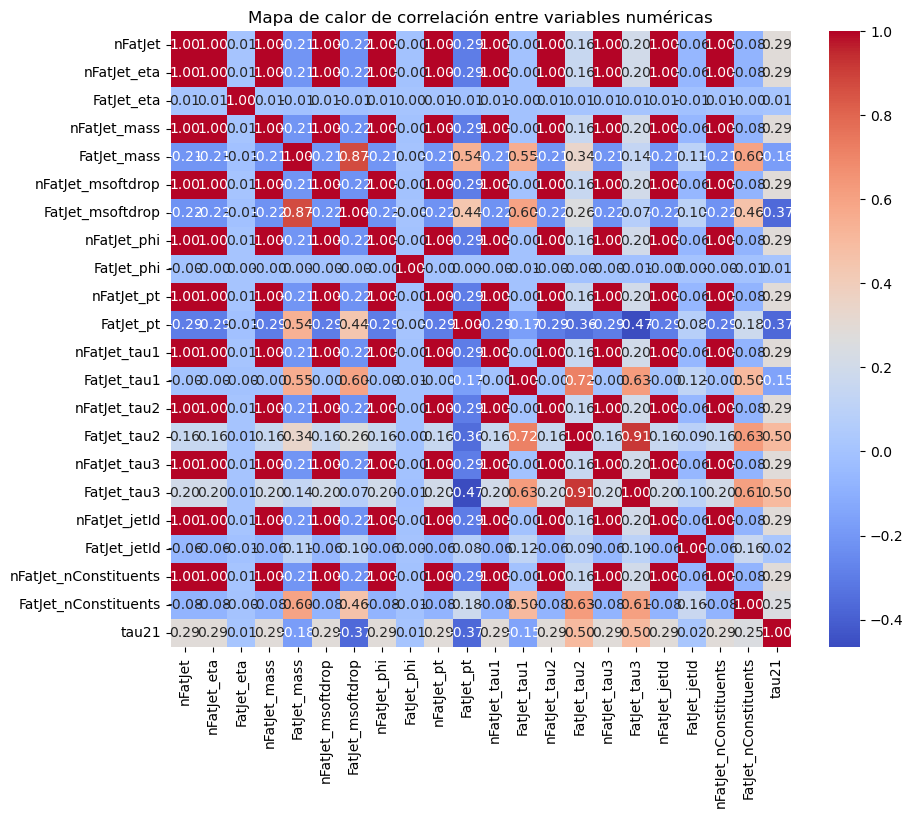

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df es tu DataFrame original con todas las variables y target

# --- Gráficos de dispersión (scatter plots) ---
# Ejemplo: entre dos variables numéricas
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='FatJet_mass', y='FatJet_pt', hue='FatJet_mass')
plt.title('Relación entre FatJet_mass y FatJet_pt')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='FatJet_mass', y='FatJet_msoftdrop', hue='FatJet_mass')
plt.title('Relación entre FatJet_mass y FatJet_msoftdrop')
plt.show()

df["tau21"] = df["FatJet_tau2"] / df["FatJet_tau1"]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='FatJet_mass', y='tau21', hue='FatJet_mass')
plt.title('Relación entre FatJet_mass y tau21')
plt.show()

# --- Heatmap de correlación ---
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()
